In [2]:
import pickle
import matplotlib
import numpy as np
from scipy.stats.stats import pearsonr   


networks = ['DINO','DINO2','CLIP_Large','BLIP_Large','CLIP','BLIP','FLAVA','VIT','CNN']

results= {}
for network in networks:
    results[network] = {}
    for task in range(6):
        with open('../Paired Object Task/Results_Balanced_{}/task{}_results.pkl'.format(network,task),'rb') as f:
            results[network][task] = pickle.load(f)

net_sec =np.zeros((len(networks)))
net_nc = np.zeros((len(networks)))
net_c = np.zeros((len(networks)))
net_disen = np.zeros((len(networks)))
net_denom = np.zeros((len(networks)))
for net_no,network in enumerate(networks):
    feature = 'all_features'
    layers = results[network][task].keys()
    series_sec = np.zeros((6,len(layers)))
    series_disen = np.zeros((6,len(layers)))
    series_disen_denom = np.zeros((6,len(layers)))
    for layer in results[network][task].keys():
        if(network == 'CNN'):
            l_out = layer-1
        else:
            l_out = layer
        for task in range(6):
            series_sec[task][l_out]= results[network][task][layer][feature][2][2]
            series_disen[task][l_out]= results[network][task][layer][feature][1][2]
            series_disen_denom[task][l_out]= results[network][task][layer][feature][1][1]
    mean_sec = np.mean(series_sec,axis =0)
    mean_disen = np.mean(series_disen,axis =0)
    mean_disen_denom = np.mean(series_disen_denom,axis =0)
    token_type = 'nc_all_features'
    with open('Results_Global/Global_Probe_caption_{}.pickle'.format(network),'rb') as f:
        g_result = pickle.load(f)
    nc_global = []
    c_global = []
    for l in g_result.keys():
        nc_global.append(g_result[l]['nc_all_features'])
        c_global.append(g_result[l]['all_features'])
    nc_global = np.array(nc_global)
    c_global = np.array(c_global)
    # if(network in ['BLIP_Large','CLIP_Large']):
    #     l = 23
    # else:
    #     l = 11
    # if(network == 'CNN'):
    #     l = 3
    l2 = np.argmax(mean_sec)
    l = np.argmax(nc_global)
    print(network,l,l2)
    net_sec[net_no] = mean_sec[l]
    # net_disen[net_no] = mean_disen[l]/mean_disen_denom[l]
    net_denom[net_no]= mean_disen_denom[l]
    net_disen[net_no] = mean_disen[l]
    net_nc[net_no] = nc_global[l]
    net_c[net_no] = c_global[l]

measure = net_disen/net_denom
print(pearsonr(net_sec,net_nc))
print(pearsonr(measure,net_nc))

print(pearsonr(net_sec,net_c))
print(pearsonr(measure,net_c))


DINO 7 8
DINO2 10 10
CLIP_Large 23 23
BLIP_Large 21 20
CLIP 9 11
BLIP 9 9
FLAVA 8 11
VIT 10 7
CNN 3 3
PearsonRResult(statistic=0.9576418157758965, pvalue=4.940782314281575e-05)
PearsonRResult(statistic=-0.5834132651364927, pvalue=0.09912826244793423)
PearsonRResult(statistic=0.7773420202837783, pvalue=0.013687293986501781)
PearsonRResult(statistic=-0.06849086888814401, pvalue=0.8610158367653581)


/tmp/ipykernel_103333/340970394.py:4: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


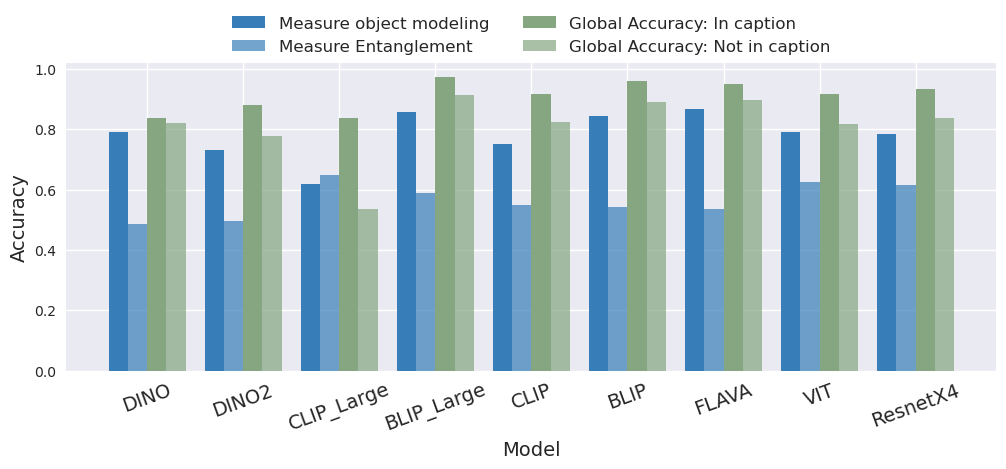

In [5]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
  
    
colors = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', "#86a681"]
# create data 
plt.style.use("seaborn-v0_8")
plt.figure(figsize = (12,4))
x = np.arange(len(networks)) 
y1 = net_sec.astype(float)
y2 = net_disen.astype(float)
y3 = net_c.astype(float)
y4 = net_nc.astype(float)

width = 0.2
  
# plot data in grouped manner of bar type 
plt.bar(x-0.3, y1, width, color=colors[0],alpha = 1) 
plt.bar(x-0.1, y2, width, color=colors[0],alpha = 0.7) 
plt.bar(x+0.1, y3, width, color=colors[4],alpha = 1) 
plt.bar(x+0.3, y4, width, color=colors[4],alpha = 0.7) 
plt.xticks(x, ['DINO','DINO2','CLIP_Large','BLIP_Large','CLIP','BLIP','FLAVA','VIT','ResnetX4'],rotation=20,fontsize=14) 
plt.xlabel("Model",fontsize=14) 
plt.ylabel("Accuracy",fontsize=14) 
plt.legend(["Measure object modeling", "Measure Entanglement",'Global Accuracy: In caption','Global Accuracy: Not in caption'],loc='upper center',ncol=2,bbox_to_anchor=(0.5, 1.2),fontsize=12) 
plt.savefig('fig6.pdf',dpi =300 ,bbox_inches='tight')